In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
df = pd.read_csv('ml-course-main/data/heart_disease/heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [3]:
df.target.value_counts()
# 526 - с положительны диагнозом, 499 - с отрицательным

1    526
0    499
Name: target, dtype: int64

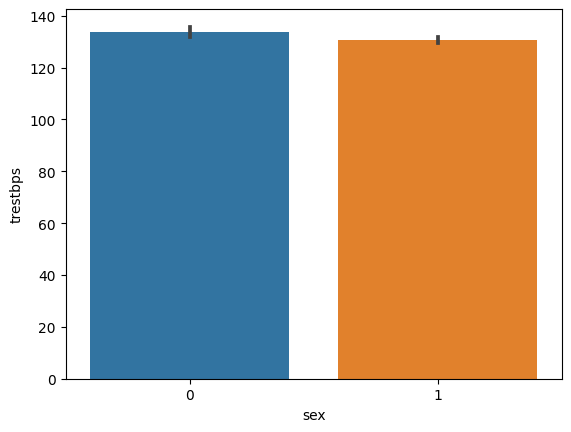

In [4]:
sns.barplot(x = "sex", y = "trestbps", data = df); # у женщин обычно большее давление

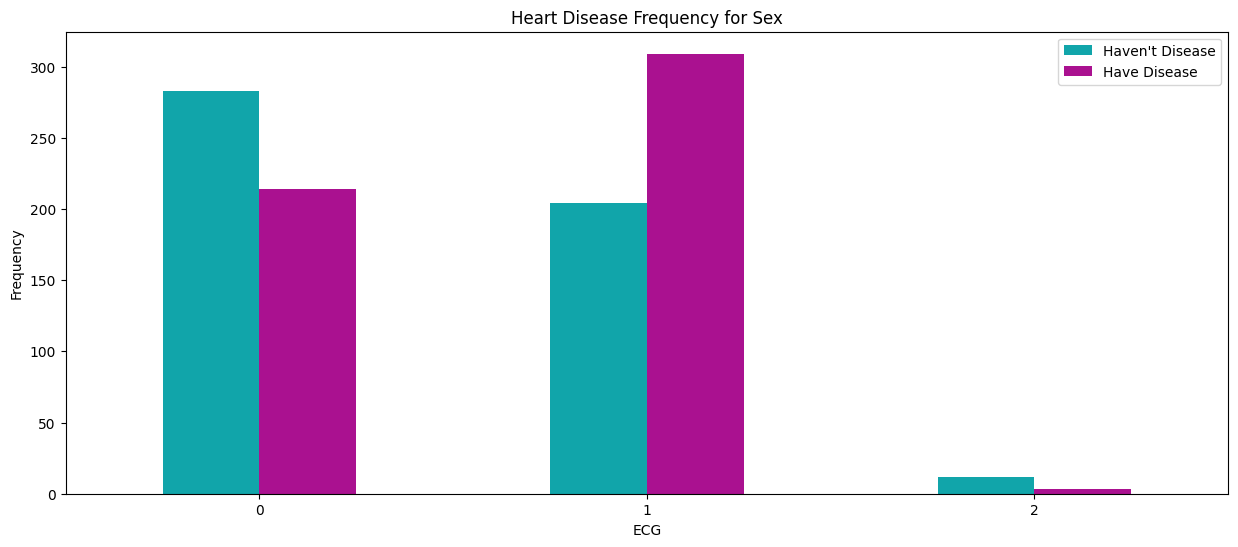

In [5]:
pd.crosstab(df.restecg,df.target).plot(kind="bar", figsize=(15, 6), color=['#11A5AA', '#AA1190' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('ECG')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [6]:
# люди с показателем restecg=1 наиболее предрасположены к заболеванию

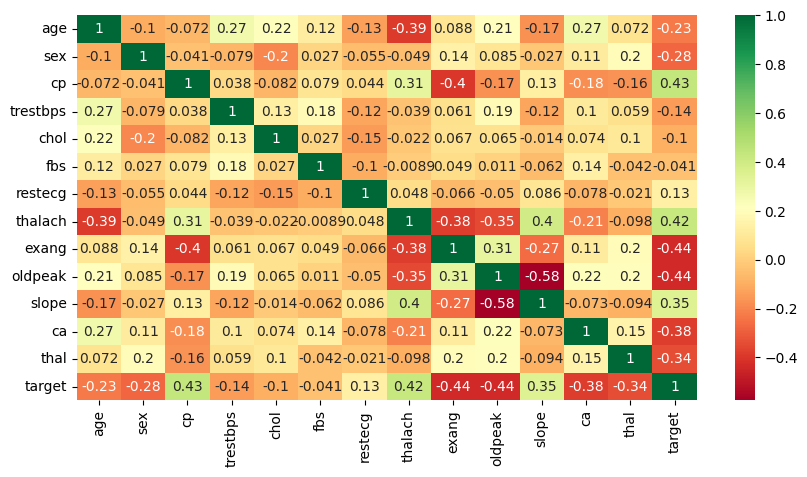

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [8]:
#присутствует большая зависимость диагноза от категории грудной боли cp, а также от максимального пульса.

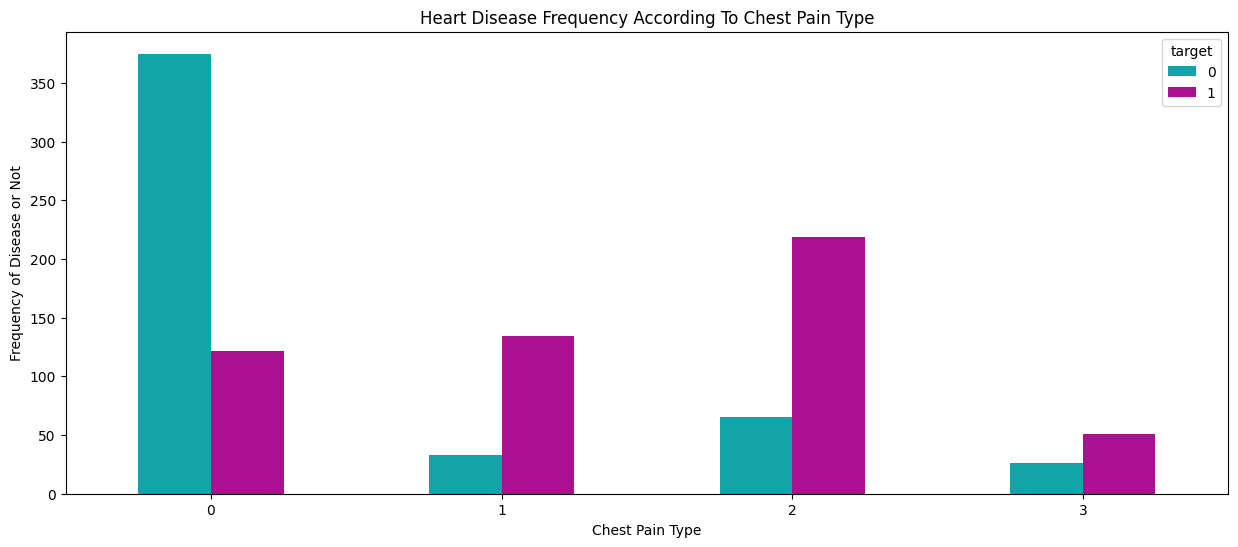

In [9]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [10]:
# из гистограммы видно, что люди, обращавшиеся с болью в груди категории 2, наиболее предрасположены к заболеванию

In [11]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [12]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


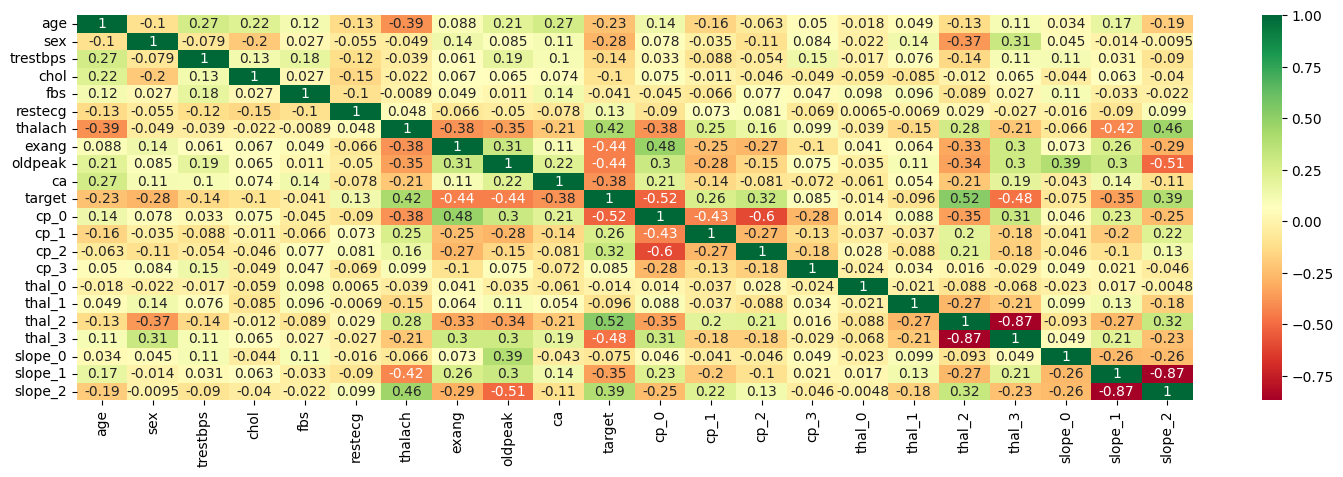

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = df["target"]
X = df.drop(columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimal number of features: 13
Selected features: ['sex', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_2', 'cp_3', 'thal_0', 'thal_3', 'slope_1']


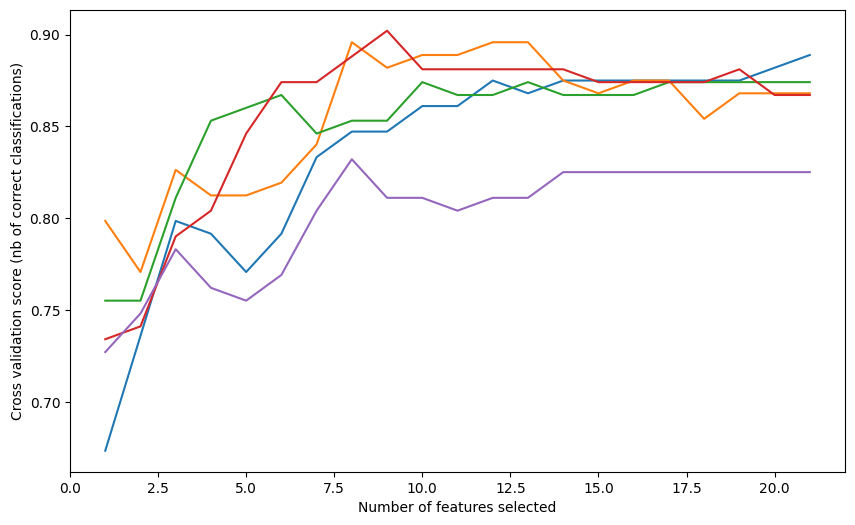

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)
cols = ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak",
        "ca","cp_0","cp_1","cp_2","cp_3","thal_0","thal_1","thal_2","thal_3","slope_0","slope_1","slope_2"]

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

to_drop = df.drop(columns=selected_features_logregr)
df = df.drop(columns=to_drop)

In [16]:
df.head()

,sex,trestbps,chol,thalach,exang,oldpeak,ca,cp_0,cp_2,cp_3,thal_0,thal_3,slope_1
0,1,125,212,168,0,1.0,2,1,0,0,0,1,0
1,1,140,203,155,1,3.1,0,1,0,0,0,1,0
2,1,145,174,125,1,2.6,0,1,0,0,0,1,0
3,1,148,203,161,0,0.0,1,1,0,0,0,1,0
4,0,138,294,106,0,1.9,3,1,0,0,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=188)
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# доп задание, добавление логистической регрессии

In [19]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import accuracy_score

class LogisticRegressionGD(BaseEstimator):
    def __init__(self, alpha=0.00501, numIterations=10000):
        self.alpha = alpha
        self.numIterations = numIterations
        
    def sigmoid(self, hypothesis): 
        return 1.0 / (1 + np.exp(-1 * hypothesis))

    def fit(self,x,y):
        x,y = check_X_y(x,y) 
        self.n_features_in_ = x.shape[1] 
        m = x.shape[0]
        self.x_ = np.c_[ np.ones(m), x] #theta0 = ones
        self.theta_ = np.ones(self.x_.shape[1])
        x_transpose = self.x_.transpose()
        
        for iter in range(0, self.numIterations):
            hypothesis = np.dot(self.x_, self.theta_)
            sigmoid_ = self.sigmoid(hypothesis)
            loss = -(y*np.log(sigmoid_)+(1-y)*np.log(1-sigmoid_)).mean()
            gradient_weights = (np.reshape(sigmoid_-y,(m,1))*x).mean(axis = 0)
            gradient_intercept = (sigmoid_-y).mean(axis = 0)
            self.theta_[0] = self.theta_[0] - self.alpha * gradient_intercept
            self.theta_[1:] = self.theta_[1:] - self.alpha * gradient_weights
            
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]
        return self
    
    def predict(self,X_test):
        check_is_fitted(self)
        X_test = check_array(X_test)
        return X_test@self.coef_+self.intercept_

In [20]:
# без создания метода score в классе LogisticRegressionGD нельзя добавить различные метрики для сравнения 

In [21]:
gd_model = LogisticRegressionGD()
gd_model.fit(X_train_scaled, y_train)
gd_y_test_pred = gd_model.predict(X_test_scaled)

In [22]:
for i in range(gd_y_test_pred.shape[0]):
    if gd_y_test_pred[i] > 0.65:
        gd_y_test_pred[i] = 1
    else:
        gd_y_test_pred[i] = 0
gd_y_test_pred = gd_y_test_pred.astype(int)

In [23]:
gd_test_acc = accuracy_score(y_test, gd_y_test_pred)
print("Test GD Accuracy {:.4f}".format(gd_test_acc))
accuracies = {}
accuracies['Logistic Regression GD'] = gd_test_acc

Test GD Accuracy 0.8701


In [24]:
# X_train_scaled, y_train, X_test_scaled, y_test

Train/Test split results:
LogisticRegression accuracy is 0.834
LogisticRegression log_loss is 0.361
LogisticRegression auc is 0.925


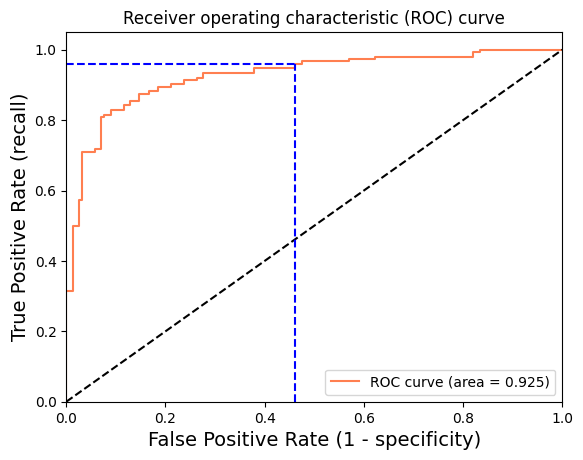

Using a threshold of 0.173 guarantees a sensitivity of 0.961 and a specificity of 0.538, i.e. a false positive rate of 46.15%.
K-fold cross-validation results:
LogisticRegression average accuracy is 0.851
LogisticRegression average log_loss is 0.352
LogisticRegression average auc is 0.924
GridSearchCV + multiple scorers + RepeatedStratifiedKFold + pipeline
best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.20001000000000002, random_state=11))])
best params: {'clf__C': 0.20001000000000002}
best score: 0.8566122766122766
test score: 0.8344155844155844


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, lr_pred_proba)
print('Train/Test split results:')
print(lr.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, lr_pred))
print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, lr_pred_proba))
print(lr.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # индекс первого threshold с tpr > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

scores_accuracy = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(lr.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(lr.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(lr.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


C = np.arange(1e-05, 5, 0.1)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

lr = LogisticRegression(random_state=11)

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',lr)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_

print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold + pipeline')
print('='*80)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print("test score:", log_clf.score(X_test, y_test))
print('='*80)
lr = LogisticRegression(C=0.20001000000000002, random_state=11)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = lr.score(X_test, y_test)
accuracies['Logistic Regression'] = lr_acc

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(10)

svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')
grid_svm.fit(X_train_scaled, y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
svm = SVC(random_state=11, C=2, gamma=1, kernel='rbf' )
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = svm_acc
print("Test SVM Accuracy: {:.4f}".format(svm_acc))

best score:  0.9833137715179969
best param:  {'C': 2, 'gamma': 1, 'kernel': 'rbf'}
Test SVM Accuracy: 0.9675


In [27]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 11, 2) # n_neighbors means k
weights = ['uniform', 'distance'] # weight of each neighbor

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier()  

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

knn_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)
results = knn_clf.cv_results_

print('='*80)
print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
print('='*80)
knn = KNeighborsClassifier(n_neighbors=9, weights='distance') 
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = knn.score(X_test, y_test)
print("KNN Accuracy is {:.4f}".format(knn_acc))
accuracies['KNN'] = knn_acc

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
best params: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
best score: 0.9771231546231546
KNN Accuracy is 0.9773


In [28]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()  

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)
results = nb_clf.cv_results_

print('='*80)
print("best estimator: " + str(nb_clf.best_estimator_))
print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
print('='*80)
nb = GaussianNB(priors=None, var_smoothing=0.008111308307896872)
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test) 
nb_acc = nb.score(X_test, y_test)
print("Accuracy of Naive Bayes: {:.4f}".format(nb_acc))
accuracies['Naive Bayes'] = nb_acc

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=0.008111308307896872))])
best params: {'clf__priors': None, 'clf__var_smoothing': 0.008111308307896872}
best score: 0.8417890442890444
Accuracy of Naive Bayes: 0.6721


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]

cv = StratifiedKFold(10)

dtc = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=dtc, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), refit='Accuracy')
grid_dt.fit(X_train, y_train)
print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
dtc = DecisionTreeClassifier(random_state=81, criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2, splitter='best')
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test) 
dt_acc = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.4f}".format(dt_acc))
accuracies['Decision Tree'] = dt_acc

best score:  0.9790297339593115
best param:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Decision Tree Test Accuracy 0.9740


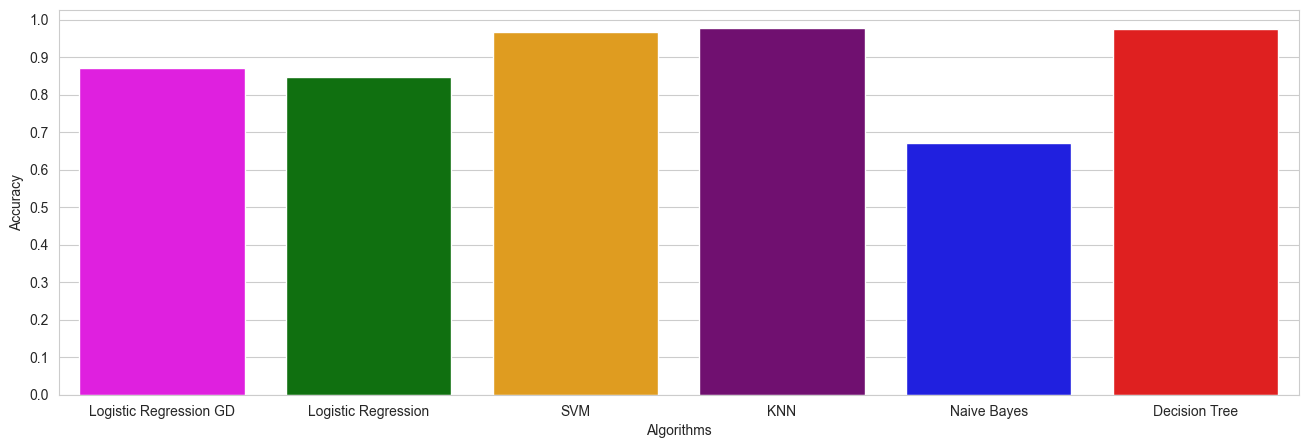

In [30]:
colors = ["magenta", "green", "orange", "purple", "blue", "red","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
cm_gd = confusion_matrix(y_test, gd_y_test_pred)
cm_lr = confusion_matrix(y_test, lr_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_dtc = confusion_matrix(y_test, dtc_pred)

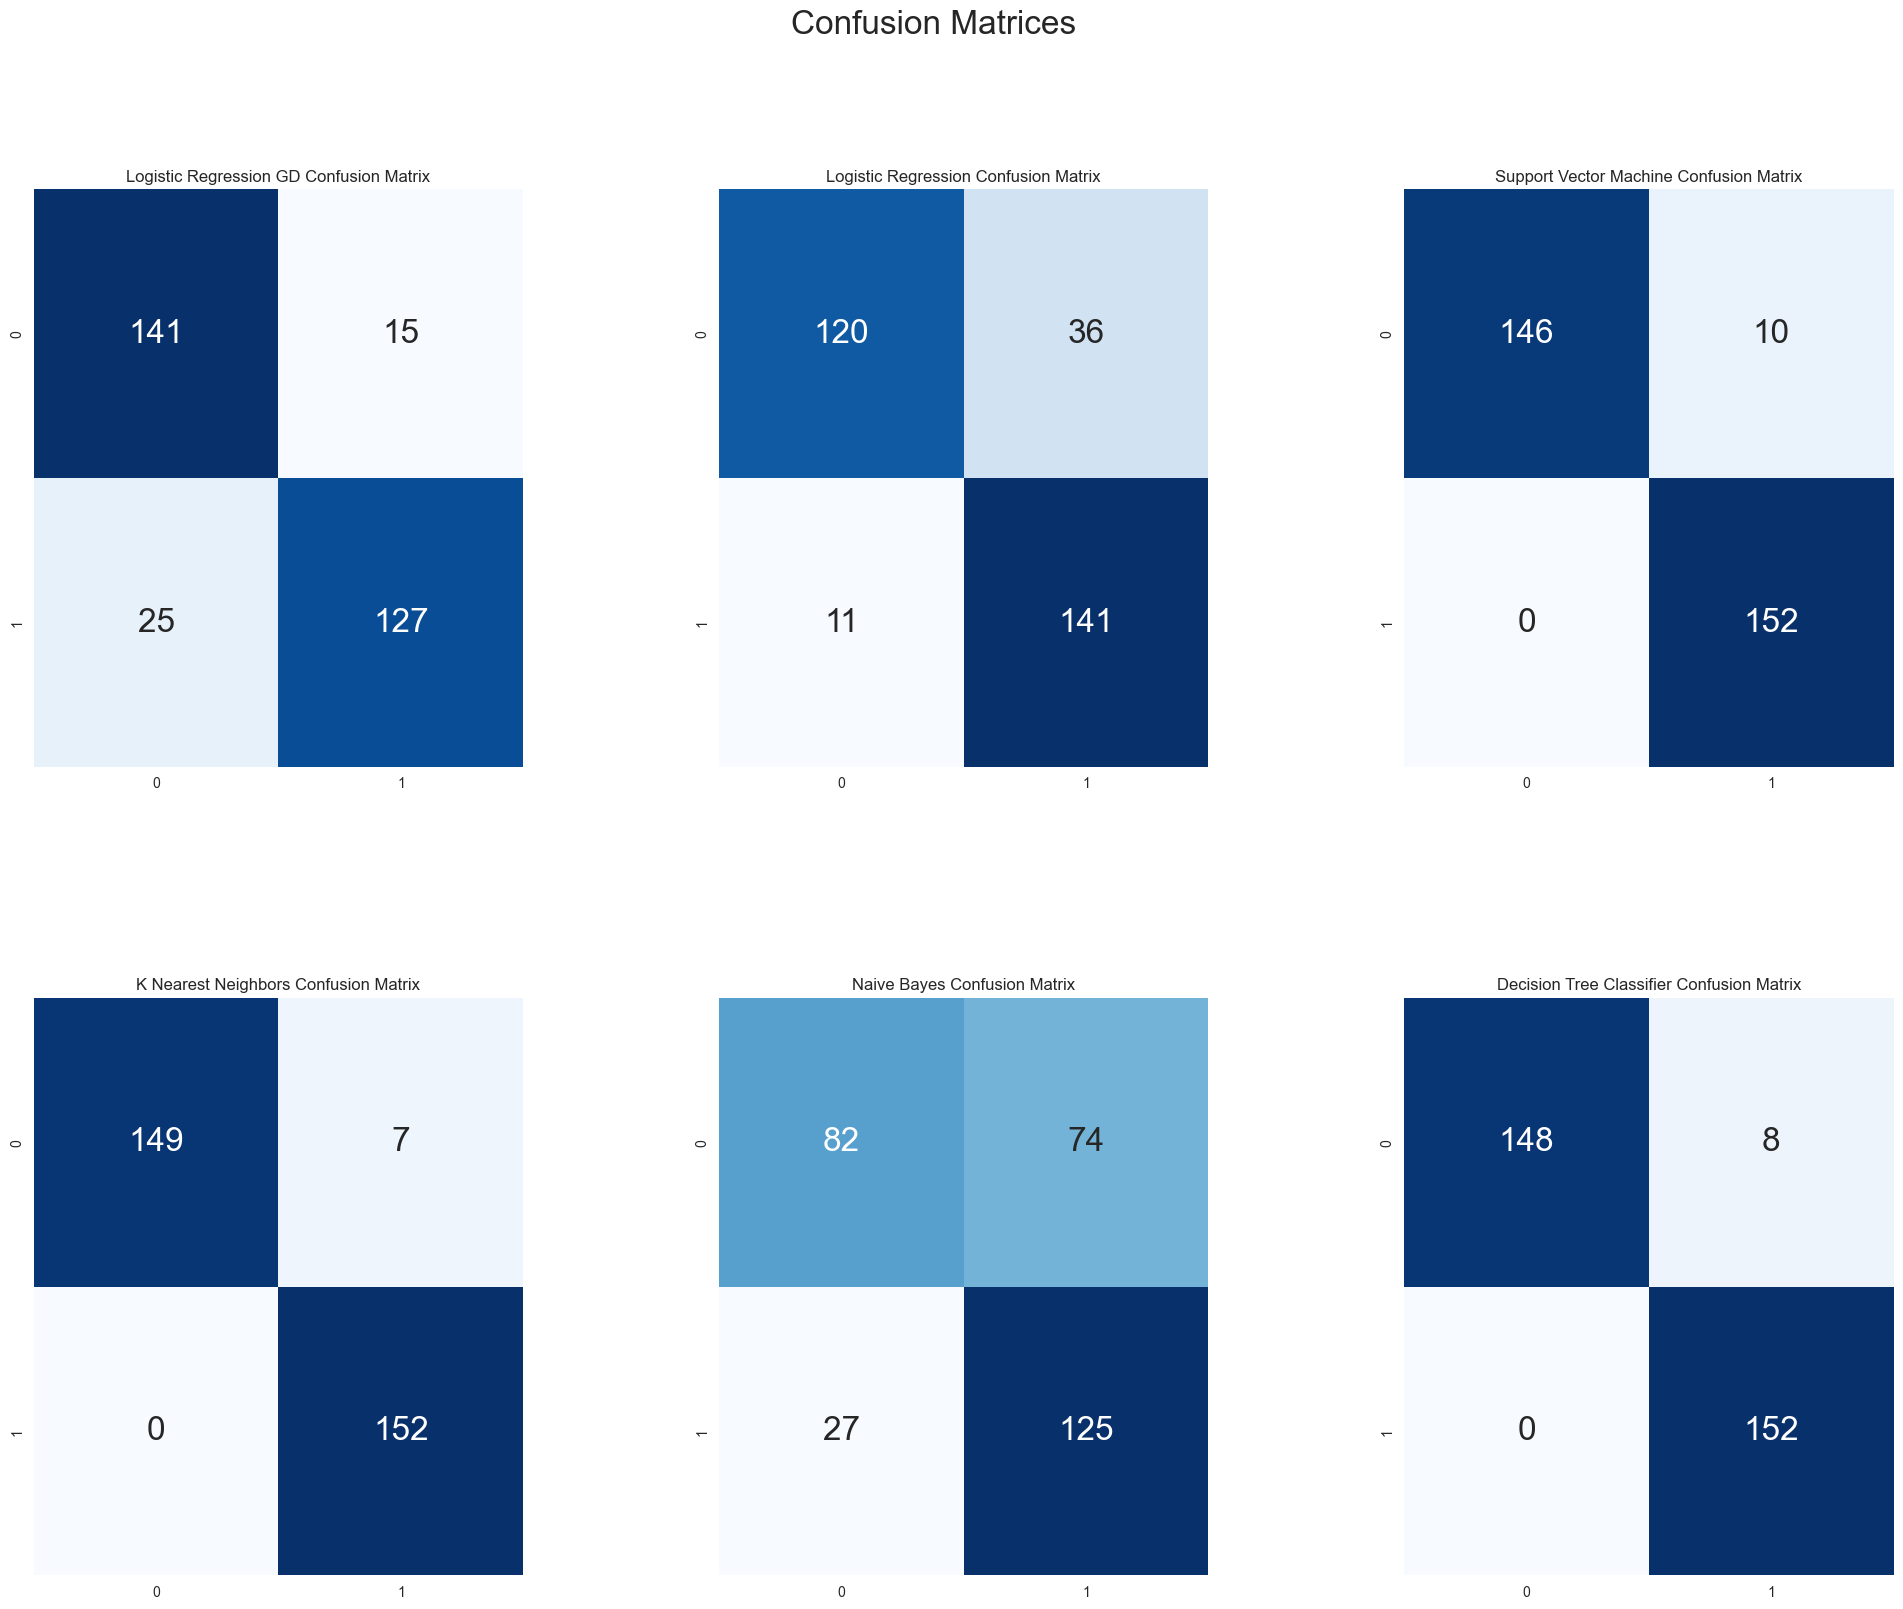

In [33]:
plt.figure(figsize=(24, 18))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression GD Confusion Matrix")
sns.heatmap(cm_gd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

In [33]:
# наилучшими моделями на предложенной выборке являются решающее дерево и метод К-ближайших соседей
# у реализованной модели логистичееской регрессии немного лучше показатели точности предсказаний
# на тестовой выборке, однако у библиотечной реализации больше правильных положительных распознаваний заболевания

In [ ]:
0.8571 88
0.8669 158
0.8701 188
0.8539 248

In [ ]:
#классификация заболевания диабетом

In [34]:
df = pd.read_csv('ml-course-main/data/diabetes.csv', encoding = "ISO-8859-1")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


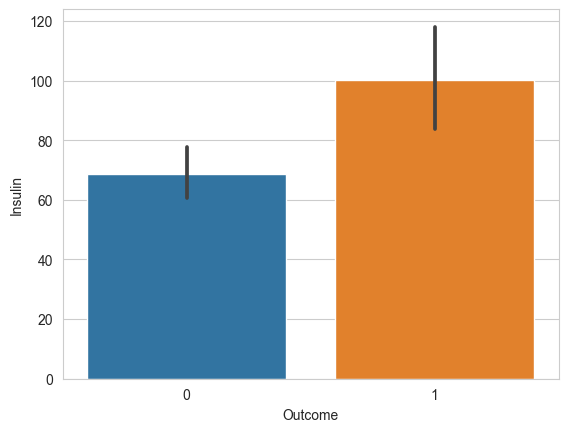

In [35]:
sns.barplot(x = "Outcome", y = "Insulin", data = df); # у болеющих содержится больше инсулина в крови

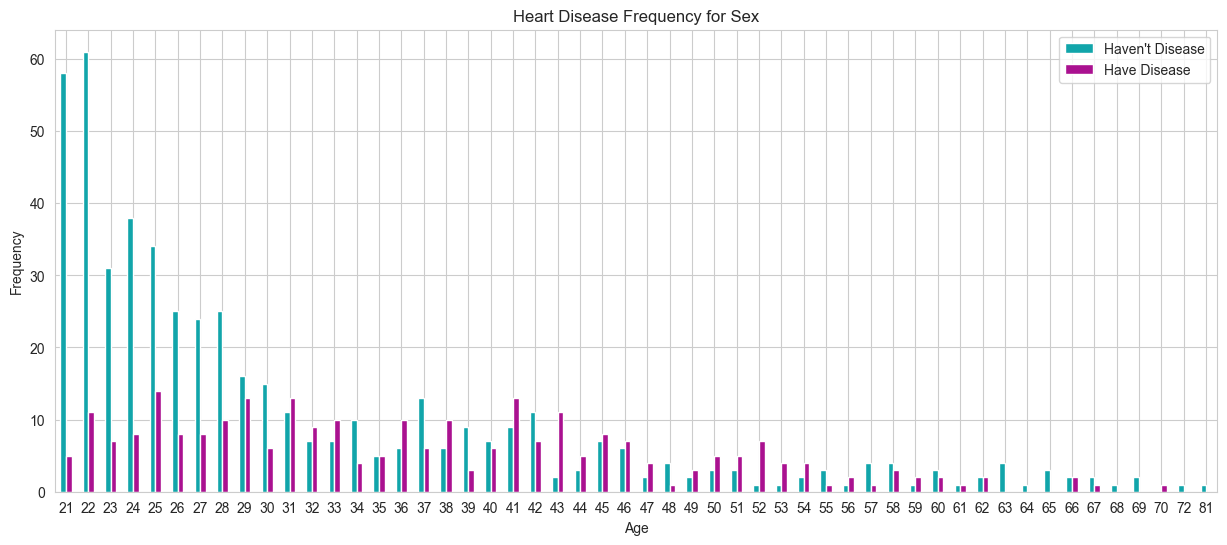

In [36]:
pd.crosstab(df.Age,df.Outcome).plot(kind="bar", figsize=(15, 6), color=['#11A5AA', '#AA1190' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
# повышения уровня заболеваемости происходит после 30 лет.

In [37]:
df.Outcome.value_counts()
# 268 людей болеет

0    500
1    268
Name: Outcome, dtype: int64

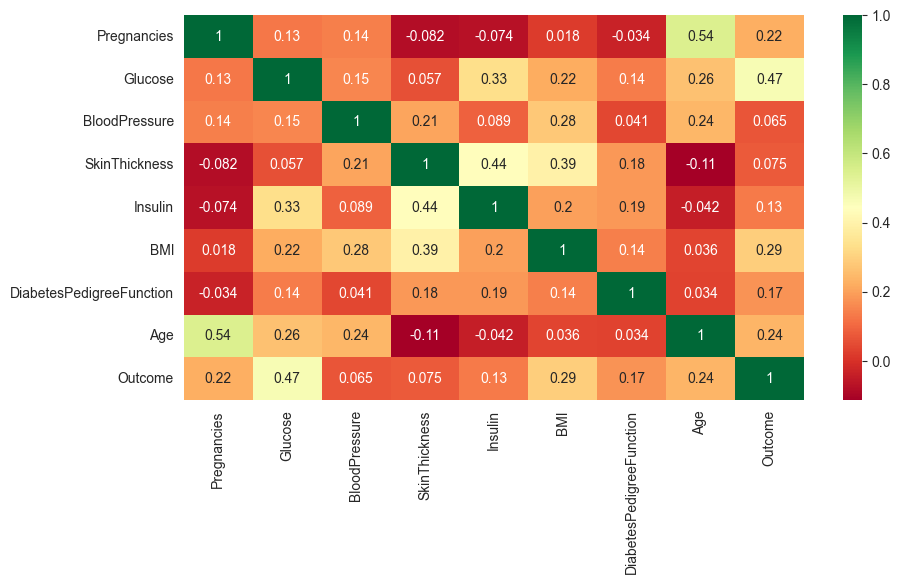

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()
#наличие глюкозы в крови сильно коррелирует с конечным диагнозом

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = df["Outcome"]
X = df.drop(columns=["Outcome"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=188)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optimal number of features: 8
Selected features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


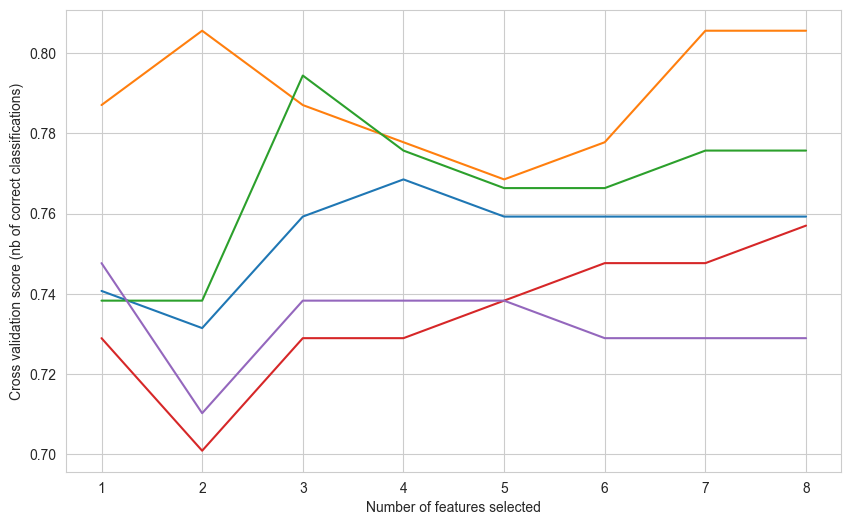

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
        "BMI","DiabetesPedigreeFunction","Age"]

selected_features_logregr = list(rfecv.get_feature_names_out(cols))

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features_logregr)

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

to_drop = df.drop(columns=selected_features_logregr)
df = df.drop(columns=to_drop)

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=188)
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
gd_model = LogisticRegressionGD()
gd_model.fit(X_train_scaled, y_train)
gd_y_test_pred = gd_model.predict(X_test_scaled)

In [44]:
for i in range(gd_y_test_pred.shape[0]):
    if gd_y_test_pred[i] > 0.35:
        gd_y_test_pred[i] = 1
    else:
        gd_y_test_pred[i] = 0
gd_y_test_pred = gd_y_test_pred.astype(int)

In [45]:
gd_test_acc = accuracy_score(y_test, gd_y_test_pred)
print("Test GD Accuracy {:.4f}".format(gd_test_acc))
accuracies = {}
accuracies['Logistic Regression GD'] = gd_test_acc

Test GD Accuracy 0.7835


Train/Test split results:
LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.443
LogisticRegression auc is 0.863


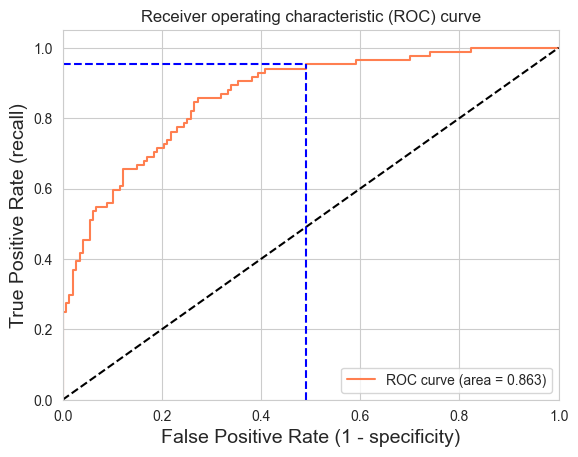

Using a threshold of 0.172 guarantees a sensitivity of 0.952 and a specificity of 0.510, i.e. a false positive rate of 48.98%.
K-fold cross-validation results:
LogisticRegression average accuracy is 0.765
LogisticRegression average log_loss is 0.498
LogisticRegression average auc is 0.823
GridSearchCV + multiple scorers + RepeatedStratifiedKFold + pipeline
best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf', LogisticRegression(C=0.10001, random_state=11))])
best params: {'clf__C': 0.10001}
best score: 0.7567601246105918
test score: 0.7792207792207793


In [46]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, lr_pred_proba)
print('Train/Test split results:')
print(lr.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, lr_pred))
print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, lr_pred_proba))
print(lr.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) # индекс первого threshold с tpr > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

scores_accuracy = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(lr.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(lr.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(lr.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


C = np.arange(1e-05, 5, 0.1)

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

lr = LogisticRegression(random_state=11)

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

log_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',lr)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_

print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold + pipeline')
print('='*80)
print("best estimator: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print("test score:", log_clf.score(X_test, y_test))
print('='*80)
lr = LogisticRegression(C=0.10001, random_state=11)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = lr.score(X_test, y_test)
accuracies['Logistic Regression'] = lr_acc

In [47]:
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

cv = StratifiedKFold(10)

svm = SVC(random_state=11)
grid_svm = GridSearchCV(estimator=svm, cv=cv, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')
grid_svm.fit(X_train_scaled, y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
svm = SVC(random_state=11, C=0.75, gamma=0.01, kernel='rbf' )
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = svm_acc
print("Test SVM Accuracy: {:.4f}".format(svm_acc))

best score:  0.7729210342417889
best param:  {'C': 0.75, 'gamma': 0.01, 'kernel': 'rbf'}
Test SVM Accuracy: 0.7879


In [48]:
n_neighbors = np.arange(1, 11, 2) # n_neighbors means k
weights = ['uniform', 'distance'] # weight of each neighbor

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier()  

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=12)

knn_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)
results = knn_clf.cv_results_

print('='*80)
print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
print('='*80)
knn = KNeighborsClassifier(n_neighbors=9, weights='distance') 
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = knn.score(X_test, y_test)
print("KNN Accuracy is {:.4f}".format(knn_acc))
accuracies['KNN'] = knn_acc

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
best params: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
best score: 0.7270889581169955
KNN Accuracy is 0.7792


In [49]:
priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()  

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)
results = nb_clf.cv_results_

print('='*80)
print("best estimator: " + str(nb_clf.best_estimator_))
print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
print('='*80)
nb = GaussianNB(priors=[0.62, 0.38], var_smoothing=0.8111308307896871)
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test) 
nb_acc = nb.score(X_test, y_test)
print("Accuracy of Naive Bayes: {:.4f}".format(nb_acc))
accuracies['Naive Bayes'] = nb_acc

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 GaussianNB(priors=[0.62, 0.38],
                            var_smoothing=0.8111308307896871))])
best params: {'clf__priors': [0.62, 0.38], 'clf__var_smoothing': 0.8111308307896871}
best score: 0.7388958116995501
Accuracy of Naive Bayes: 0.6494


In [50]:
criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]

cv = StratifiedKFold(10)

dtc = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=dtc, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), refit='Accuracy')
grid_dt.fit(X_train, y_train)
print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
dtc = DecisionTreeClassifier(random_state=81, criterion='entropy', max_depth=9, min_samples_leaf=6, min_samples_split=2, splitter='random')
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test) 
dt_acc = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.4f}".format(dt_acc))
accuracies['Decision Tree'] = dt_acc

best score:  0.7581062194269742
best param:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 2, 'splitter': 'random'}
Decision Tree Test Accuracy 0.7229


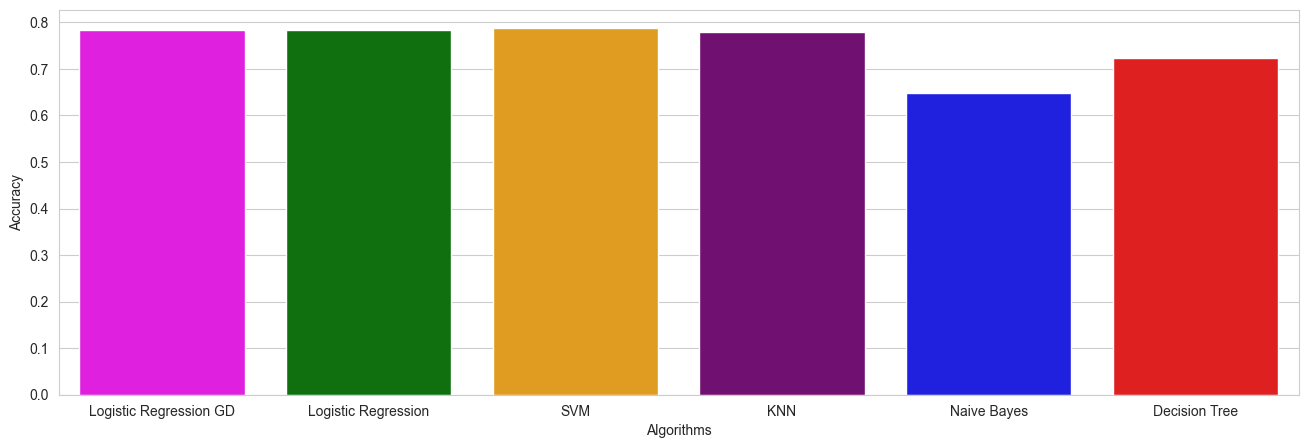

In [51]:
colors = ["magenta", "green", "orange", "purple", "blue", "red","yellow"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [52]:
cm_gd = confusion_matrix(y_test, gd_y_test_pred)
cm_lr = confusion_matrix(y_test, lr_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_dtc = confusion_matrix(y_test, dtc_pred)

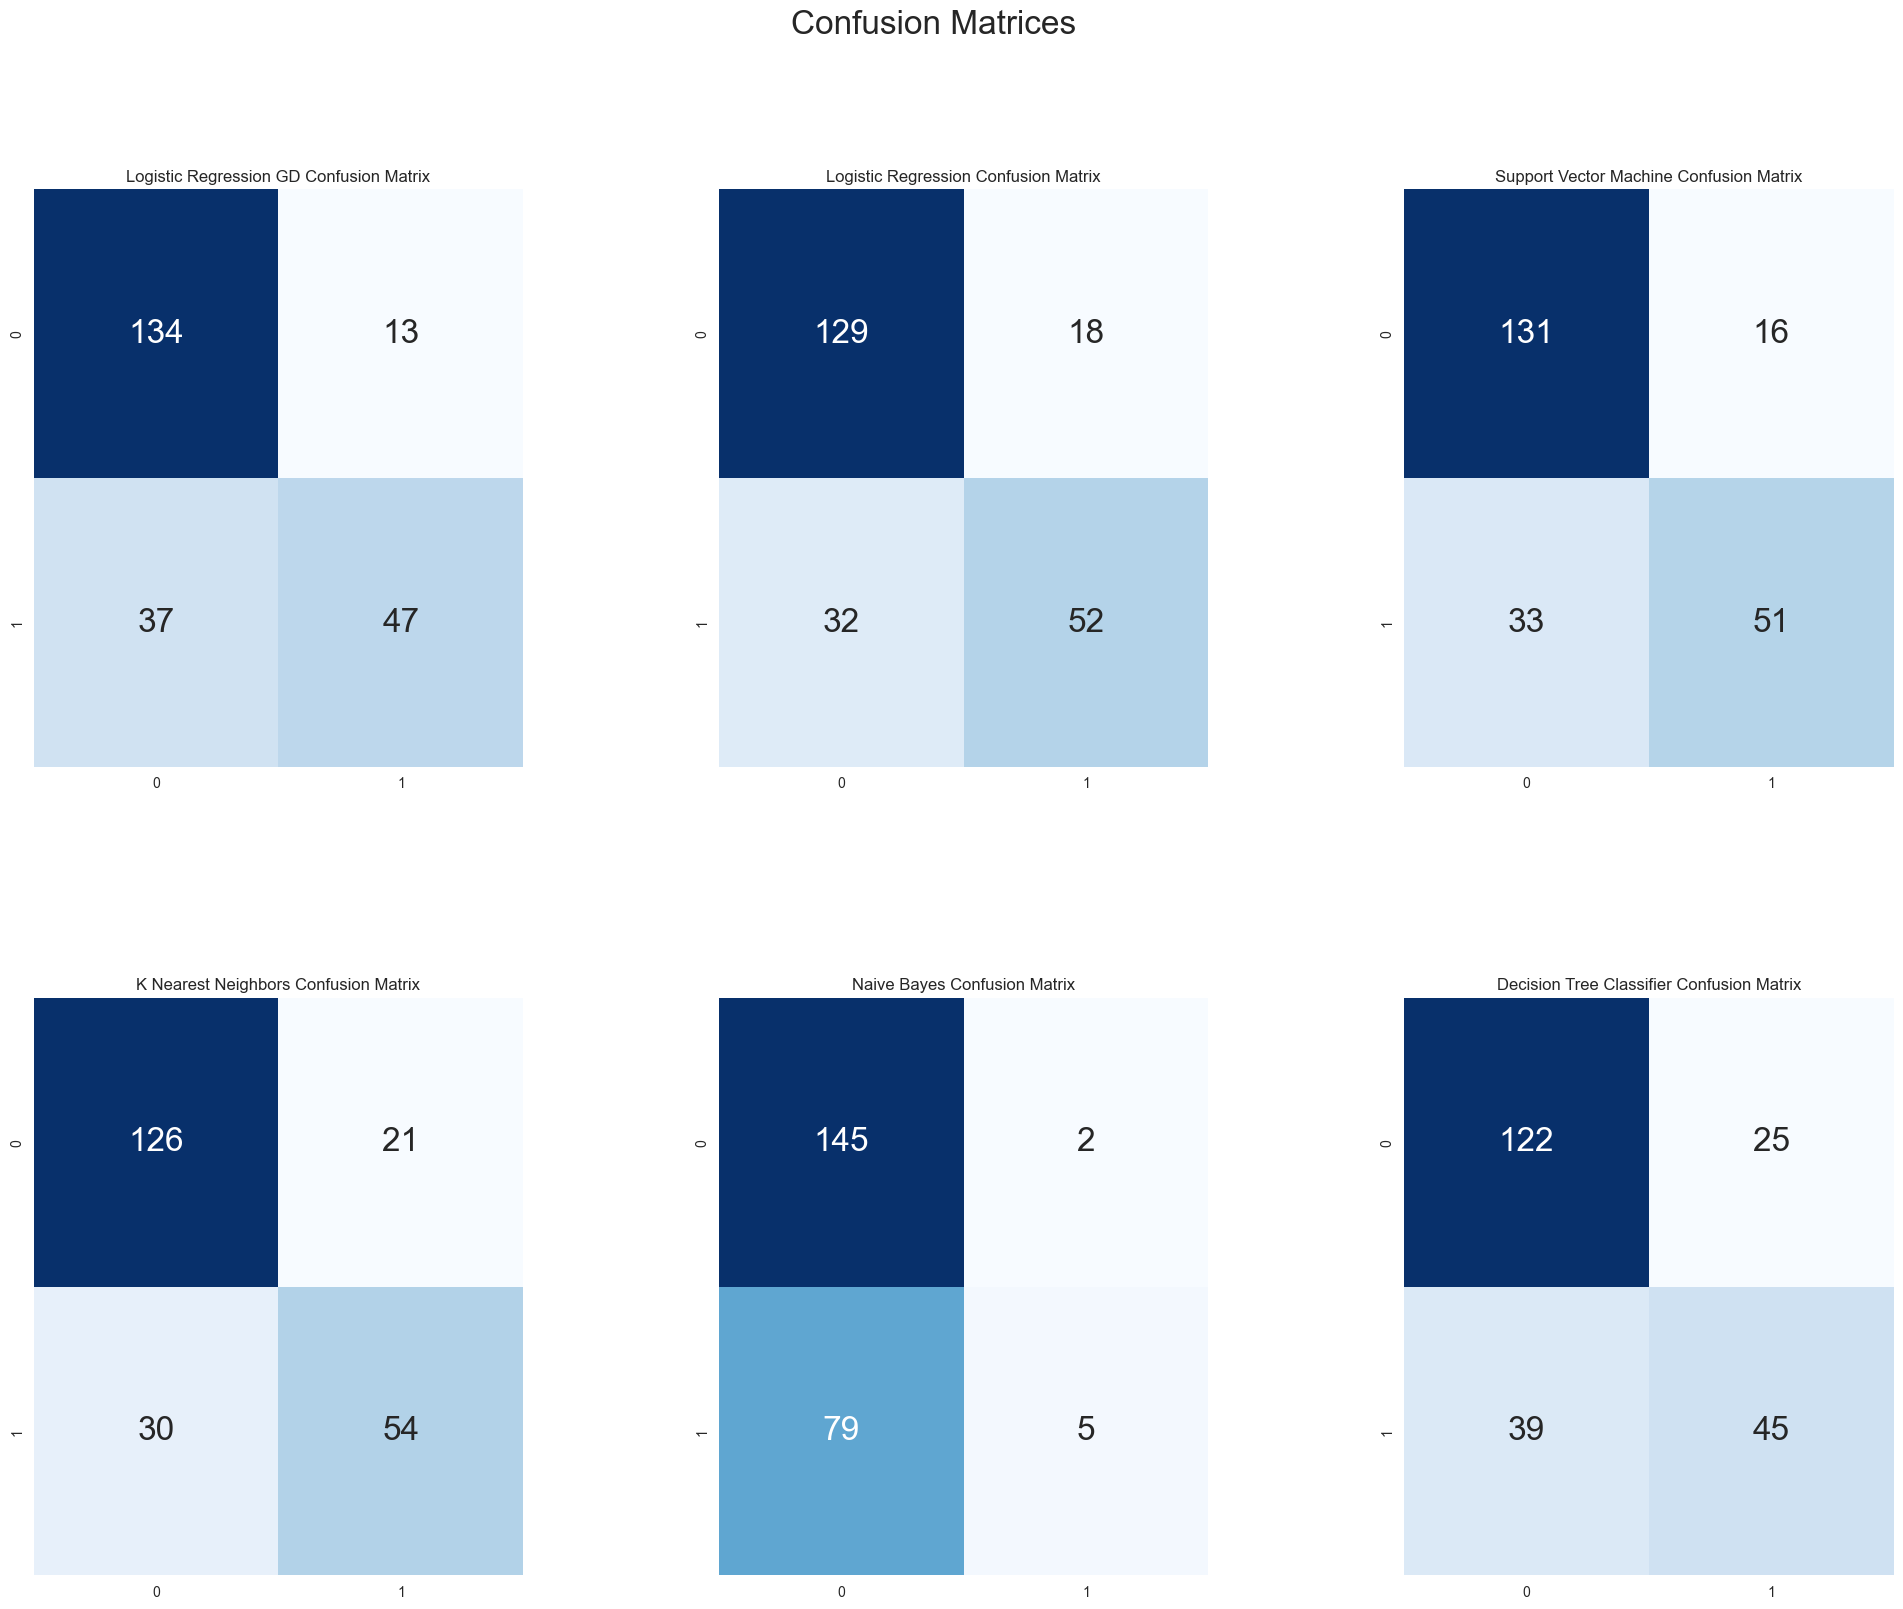

In [53]:
plt.figure(figsize=(24, 18))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression GD Confusion Matrix")
sns.heatmap(cm_gd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [54]:
# на данной тестовой выборке все модели, за исключение байесовского предсказателя, показали схожее поведение,
# однако у логистической регрессии,обученной градиентным спуском выше показатель точности предсказаний
# ввиду большего числа правильных распознаваний
# отсутствия болезни

In [55]:
np.unique(y_test, return_counts=True) # в тестовой выборке 84 случая заболеваний

(array([0, 1]), array([147,  84]))